# Merge the analysis from 01,02,03 mask analysis notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import sys, os
#from cellpose import io
from skimage import io
from skimage.measure import label, regionprops

other_dir_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(other_dir_path)

import IMCprocess.spatial_analysis.mask_utils as mu
import IMCprocess.utils.utils as ut

## test class

In [2]:
data_path = '/Users/pattama/Desktop/UiB/cancer/example_share_code/share_with_vladan/mask_analysis/example_data/'
data_lev1 = ut.read_pickle_obj(data_path+'00hanna_adata_totalNB_obj_Level1.pkl')

In [3]:
data_lev1.adata_dict

{'level1': AnnData object with n_obs × n_vars = 132951 × 51
     obs: 'img_id', 'PhenoGraph_clusters', 'level1_annotated'
     uns: 'pca', 'PhenoGraph_Q', 'PhenoGraph_k', 'neighbors', 'umap', 'PCs', 'dendrogram_PhenoGraph_clusters', 'PhenoGraph_clusters_colors', 'level1_annotated_colors'
     obsm: 'spatial', 'X_pca', 'X_umap'
     obsp: 'distances', 'connectivities'}

In [4]:
# Get only the object for image R2_002
# You can change image name to get other images
obj_level1 = data_lev1.adata_dict['level1']
obj_R2_002_lev1 = obj_level1[obj_level1.obs['img_id'] == 'R2_002']

In [5]:
# Create object for Cell_mask, cancer_mask and tissue_mask
Cell_mask = mu.Mask(mask_file='example_data/Patient2_002.tiff',
                    img_id='R2_002', mask_type='cell_mask')
Cancer_mask = mu.Mask(mask_file='example_data/Patient2_002_cancer_mask.tiff',
                    img_id='R2_002', mask_type='cancer_mask')
Tissue_mask = mu.Mask(mask_file='example_data/Patient2_002_tissue_mask.tiff',
                    img_id='R2_002', mask_type='tissue_mask')

In [6]:
# mask object has mask_df attribute to get the mask data
Tissue_mask.mask_df

,label,area,centroid_x,centroid_y
0,1,588488,390.951374,390.677767
1,2,95,785.936842,742.515789


In [7]:
Img_R2_002 = mu.Img_mask(obj_R2_002_lev1, Cell_mask, Cancer_mask, Tissue_mask)

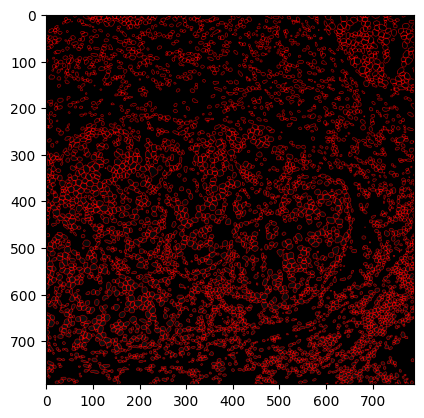

In [9]:
Img_R2_002.plot_outline_mask(masktype='cell_mask')